In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
data = pd.read_csv('lsd_math_score_data.csv')

In [2]:
print(data)

   Time_Delay_in_Minutes  LSD_ppm  Avg_Math_Test_Score
0                      5     1.17                78.93
1                     15     2.97                58.20
2                     30     3.26                67.47
3                     60     4.69                37.47
4                    120     5.83                45.65
5                    240     6.00                32.92
6                    480     6.41                29.97


In [3]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [4]:
# these are dataframe type
time = data[['Time_Delay_in_Minutes']]
LSD = data[['LSD_ppm']]
score = data[['Avg_Math_Test_Score']]

In [5]:
type(LSD) # but if it was LSD = data['LSD_ppm'] if will be series because we'll call single column 

pandas.core.frame.DataFrame

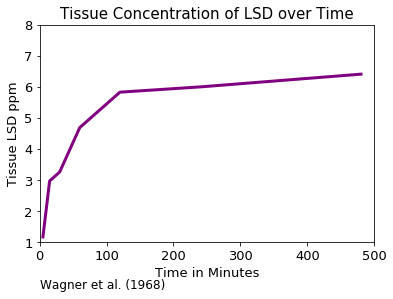

In [6]:
# export these chart alogn with notebook(just a jupyter notebook thing)
%matplotlib inline 

# Placing title and labeling the chart
plt.title('Tissue Concentration of LSD over Time', fontsize=15)
plt.xlabel('Time in Minutes', fontsize=13)
plt.ylabel('Tissue LSD ppm',fontsize=13)

# Increasing the text size of labels 
plt.text(x=0, y=-0.5, s='Wagner et al. (1968)', fontsize=12) # place text for labelling
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# limiting the chart size x and y axis
plt.ylim(1,8)
plt.xlim(0,500)

# Type of style graph 
# plt.style.use('ggplot')
plt.style.use('classic')

plt.plot(time, LSD, color='purple', linewidth=3)    # for more *args and **kwargs check the matplotlib documentation
plt.show()


In [7]:
regr = LinearRegression()
regr.fit(LSD, score)
# to get raw value of the array that coef_ make we use[0][0](two times because it's array inside array)
print('Theta1: ', regr.coef_[0][0])
print('Intercept: ', regr.intercept_[0])

# Variation in data (r2)
print('R-square(residual value): ',regr.score(LSD, score))  # called as goodness of fit 

# maths score based on ammount of drug in tissue
predicted_score = regr.predict(LSD)  

Theta1:  -9.009466415296785
Intercept:  89.12387376799308
R-square(residual value):  0.8778349707775889


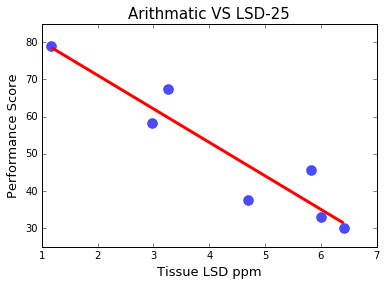

In [8]:
%matplotlib inline 
plt.title('Arithmatic VS LSD-25', fontsize=15)
plt.xlabel('Tissue LSD ppm', fontsize=13)
plt.ylabel('Performance Score',fontsize=13)

plt.ylim(25,85)
plt.xlim(1,7)
plt.style.use('fivethirtyeight')

plt.scatter(LSD, score, color='blue', s=100, alpha=0.7)
plt.plot(LSD, predicted_score, color='r', linewidth=3)
plt.show()